In [45]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
import os
load_dotenv()

True

In [36]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    
    messages: Annotated[list[BaseMessage], add_messages]

In [37]:
llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash-lite-preview-06-17",
        api_key=os.environ["GEMINI_API_KEY"]
)

In [38]:
system_message = SystemMessage(content="""
    You are an AI chatbot designed to provide short, concise, and accurate responses. Answer queries clearly and directly, using as few words as needed without losing meaning. Avoid unnecessary explanations, filler, or repetition. Stay relevant and focused on the user's question.
""")

In [39]:
def chatnode(state: ChatState) -> ChatState:
    messages = state["messages"]
    response = llm.invoke(messages).content
    return {"messages": [system_message, response]}

In [46]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)
graph.add_node("chatnode", chatnode)
graph.add_edge(START, "chatnode")
graph.add_edge("chatnode", END)
workflow = graph.compile(checkpointer=checkpointer)

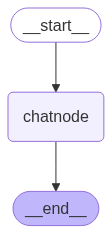

In [41]:
from IPython.display import display, Image
display(Image(workflow.get_graph().draw_mermaid_png()))

In [42]:
inital_state = {
    "messages" : [HumanMessage(content="Hello, How are you?")]
}

result = workflow.invoke(inital_state)["messages"][-1].content

In [43]:
result

'Hello! I am doing well, thank you for asking. I am a large language model, trained by Google. I am here and ready to help you with whatever you need. How can I assist you today?'

In [47]:
thread_id = "1"

while True:
    user_meessage = input("Type here: ")
    print("USER: ", user_meessage)
    if user_meessage.strip().lower() in ["exit", "quit", "bye"]:
        break
    config = {"configurable" : {"thread_id" : thread_id}}
    response = workflow.invoke({"messages": [HumanMessage(content=user_meessage)]}, config=config)
    print("AI:", response["messages"][-1].content)

USER:  hi
AI: Hi there! How can I help you today?
USER:  my name is Ajay
AI: Hi Ajay! It's nice to meet you.

I can help you with a wide range of tasks. For example, I can:

*   **Answer your questions:** About almost any topic you can think of.
*   **Generate creative text formats:** Like poems, code, scripts, musical pieces, email, letters, etc.
*   **Translate languages.**
*   **Summarize information.**
*   **Help you brainstorm ideas.**
*   **Write different kinds of content.**
*   **And much more!**

So, Ajay, what's on your mind today? What can I do for you?
USER:  who are you?
AI: I am a large language model, trained by Google.
USER:  do you know my name?
AI: Yes, Ajay, I do know your name. You told me it earlier.
USER:  cool
AI: Great! So, Ajay, what would you like to do now? Do you have a question, a task, or something you'd like to explore? I'm ready when you are!
USER:  exit


In [66]:
workflow.get_state(config=config).values['messages']

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='82dc7247-8826-4135-925a-c75fd9c5d7b3'),
 SystemMessage(content="\n    You are an AI chatbot designed to provide short, concise, and accurate responses. Answer queries clearly and directly, using as few words as needed without losing meaning. Avoid unnecessary explanations, filler, or repetition. Stay relevant and focused on the user's question.\n", additional_kwargs={}, response_metadata={}, id='47a402eb-6979-4145-a890-e2ae828ecd3b'),
 HumanMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={}, id='3028e206-4b29-492b-a43a-73eabb68a67e'),
 HumanMessage(content='my name is Ajay', additional_kwargs={}, response_metadata={}, id='790a1709-24e1-4ab9-8096-1fe43b1a7f5a'),
 HumanMessage(content="Hi Ajay! It's nice to meet you.\n\nI can help you with a wide range of tasks. For example, I can:\n\n*   **Answer your questions:** About almost any topic you can think of.\n*   **Gene